정확도: 0.9514563106796117


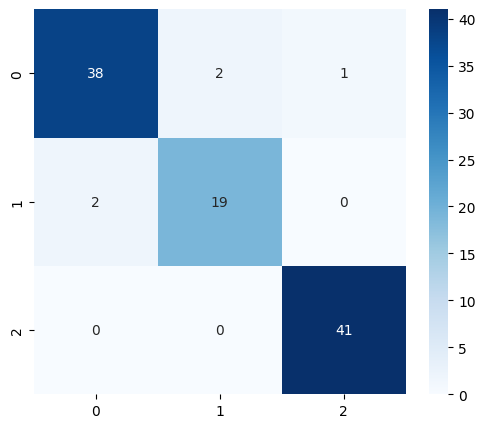

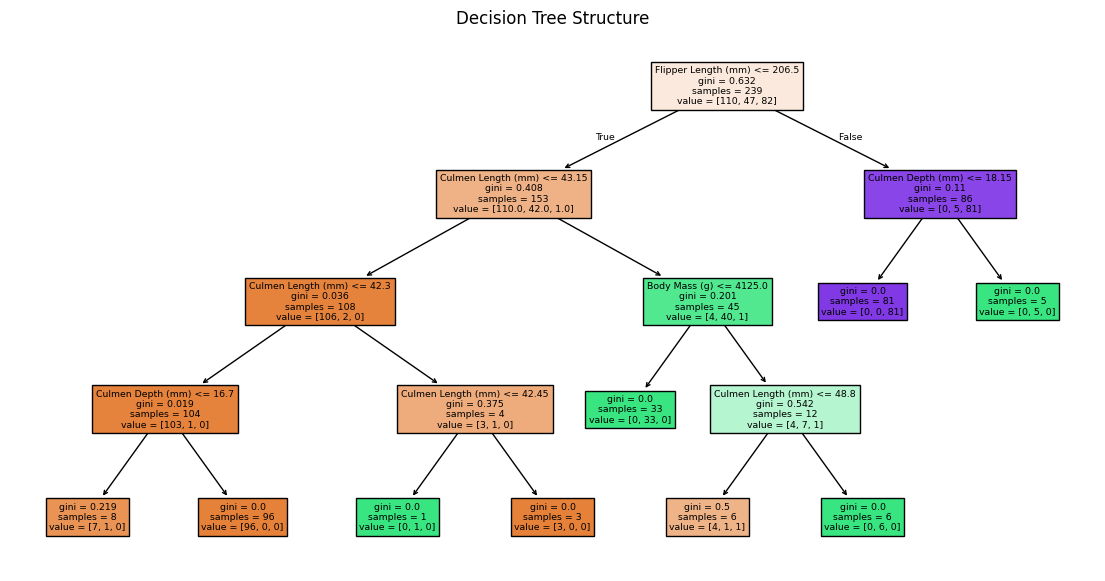

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
df = pd.read_csv("/content/penguins_lter.csv")

df_cls = df[['Culmen Length (mm)','Culmen Depth (mm)',
             'Flipper Length (mm)','Body Mass (g)','Species']].dropna()

X_cls = df_cls[['Culmen Length (mm)','Culmen Depth (mm)',
                'Flipper Length (mm)','Body Mass (g)']]
y_cls = df_cls['Species']

# 숫자 인코딩 하기
le = LabelEncoder()
y_enc = le.fit_transform(y_cls)

# 데이터 분할 하기
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_enc, test_size=0.3)

# 데이터 스케일링 하기
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

# 예측 하기
y_pred_dt = dt.predict(X_test)

# 정확도 출력하기
print("정확도:", accuracy_score(y_test, y_pred_dt))

# 히트맵 시각화 하기
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.show()

# 트리 시각화 하기
plt.figure(figsize=(14,7))
tree.plot_tree(dt, feature_names=X_cls.columns,filled=True)
plt.title("Decision Tree Structure")
plt.show()